# Lesson 9
Подготовьте отчет. 
1. Выполните зашумление изображения импульсным шумом. Проведите фильтрацию среднегеометрическим фильтром, среднегармоническим фильтром и медианам фильтром. Сделайте выводы. 
2. Покажите работу фильтра средней точки. 
3. Покажите как влияет повторение медианой фильтрации на изображение? Проведите эксперимент (применение медианной фильтрации не один раз). Покажите результаты и выводы.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import ndimage
import skimage
#from skimage.feature import peak_local_max
from skimage.util import noise
from skimage import filters, morphology, measure

## Работа фильтров берущих различные средние.

In [2]:
def gemetric_mean(img, kernel_size=(3,3)):
    height, width = img.shape
    #res = np.zeros((height-kernel_size[0]+1, width-kernel_size[1]+1))
    res = np.zeros(img.shape)
    cy = kernel_size[0]//2
    cx = kernel_size[1]//2
    for y in range(height):
        for x in range(width):
            if y+kernel_size[0] < height and x+kernel_size[1] < width:
                cnt = 0
                mul = 1
                for dy in range(kernel_size[0]):
                    for dx in range(kernel_size[1]):
                        cnt += 1
                        mul *= img[y+dy][x+dx]
                res[y+cy][x+cx] = mul ** (1/cnt)
    return res

def mean_harmonic(img, kernel_size=(3,3)):
    height, width = img.shape
    #res = np.zeros((height-kernel_size[0]+1, width-kernel_size[1]+1))
    res = np.zeros(img.shape)
    cy = kernel_size[0]//2
    cx = kernel_size[1]//2
    for y in range(height):
        for x in range(width):
            if y+kernel_size[0] < height and x+kernel_size[1] < width:
                cnt = 0
                mul = 1
                for dy in range(kernel_size[0]):
                    for dx in range(kernel_size[1]):
                        cnt += 1
                        mul += 1/img[y+dy][x+dx]
                res[y+cy][x+cx] = cnt/mul
    return res

def midpoint(img, selem=None):
    return (morphology.erosion(img, selem)+morphology.dilation(img, selem))/2

/home/progiv/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/progiv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


(-0.5, 799.5, 599.5, -0.5)

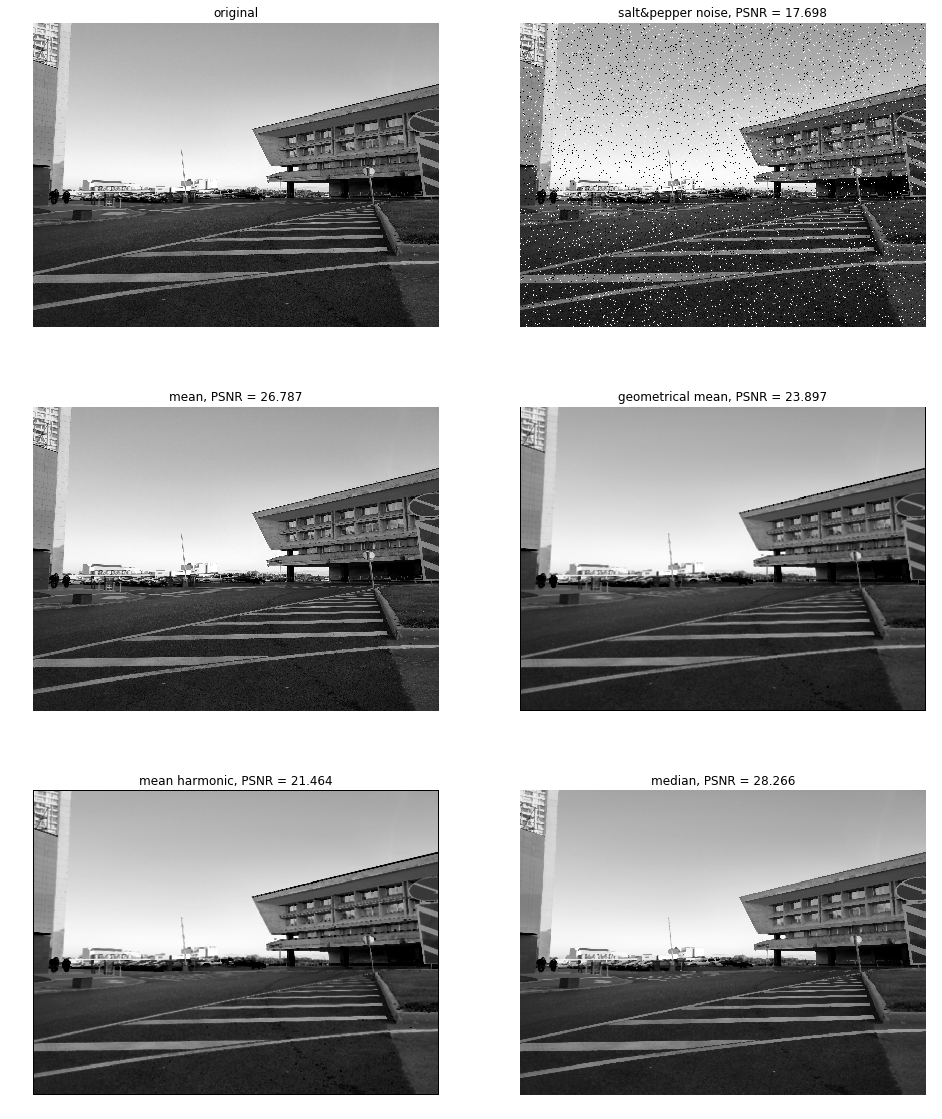

In [3]:
img = cv2.imread('../lesson5/prefect.jpg',0)
# Уменьшим изоброажение, чтобе не ждать вечность работы среднегеометрического фильтра и приведём в float.
img = cv2.resize(img, (800, 600))/255

plt.figure(figsize=(16,20))
plt.subplot(3, 2, 1)
plt.title('original')
plt.imshow(img, 'gray'); plt.axis('off')

# послолим и поперчим
salted = noise.random_noise(img, 's&p')
psnr = measure.compare_psnr(img, salted)
plt.subplot(3, 2, 2)
plt.title('salt&pepper noise, PSNR = {0:.3f}'.format(psnr))
plt.imshow(salted, 'gray'); plt.axis('off')

# Усредним
box = skimage.morphology.square(3)
mean = filters.rank.mean(img, box)
psnr = measure.compare_psnr(img, mean/255)
plt.subplot(3, 2, 3)
plt.title('mean, PSNR = {0:.3f}'.format(psnr))
plt.imshow(img, 'gray'); plt.axis('off')

# Возьмём геометическое среднее
g_mean = gemetric_mean(img)
psnr = measure.compare_psnr(img, g_mean)
plt.subplot(3, 2, 4)
plt.title('geometrical mean, PSNR = {0:.3f}'.format(psnr))
plt.imshow(g_mean, 'gray'); plt.axis('off')

# Возьмём среднее-гармоническое
h_mean = mean_harmonic(img)
psnr = measure.compare_psnr(img, h_mean)
plt.subplot(3, 2, 5)
plt.title('mean harmonic, PSNR = {0:.3f}'.format(psnr))
plt.imshow(h_mean, 'gray'); plt.axis('off')

# Медианный фильтр
median = filters.median(img)
psnr = measure.compare_psnr(img, median/255)
plt.subplot(3, 2, 6)
plt.title('median, PSNR = {0:.3f}'.format(psnr))
plt.imshow(median, 'gray'); plt.axis('off')

### Выводы:
1. Усредняющий фильтр собирает искажения от импульсного шума, после фильтрации шум всё ещё заметен.
2. Среднегеометрический фильтр справляется с данным видом шума лучше, но работает очень долго. Из-за него пришлось уменьшить изображение. При этом заодно сглаживает линии.
3. Среднегармонический фильтр кажется сделал некотрые тёмные области более светлыми, тоже работает медленно в данной реализации.
4. Медианный фильтр отлично спарвляется с импульсным шумом. Вообще сработал лучше остальных методов.

## Фильтр средней точки

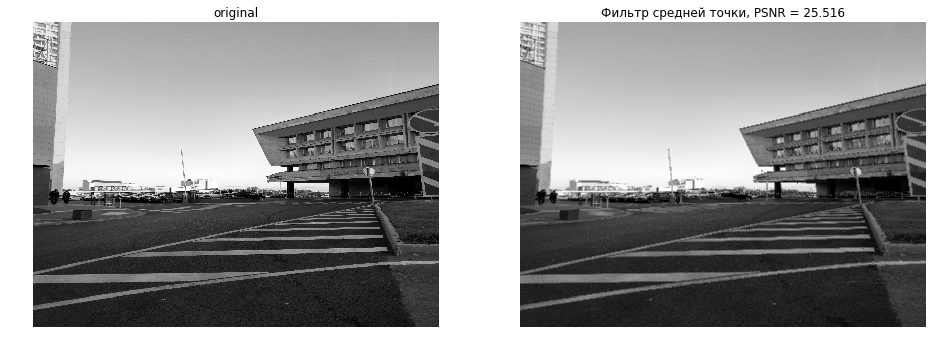

In [4]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(img, 'gray'); plt.axis('off')

plt.subplot(1, 2, 2)
mid = midpoint(img)
psnr = measure.compare_psnr(img, mid)
plt.title('Фильтр средней точки, PSNR = {0:.3f}'.format(psnr))
plt.imshow(mid, 'gray'); plt.axis('off'); plt.show()

### Вывод:
Импульсный шум был удалёен, но при этом изображение достаточно сильно размылось.

## Многкратное повторени медианного фильтра

/home/progiv/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


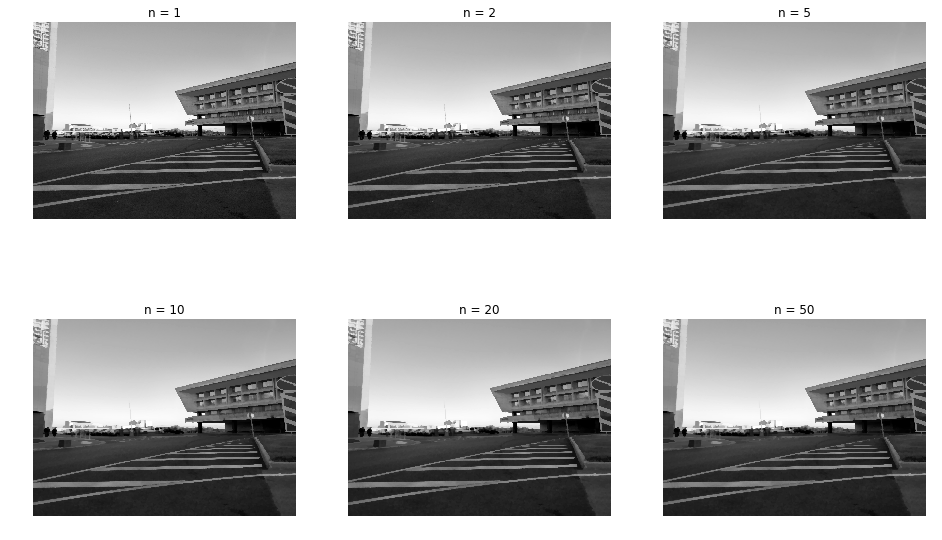

In [5]:
plt.figure(figsize=(16,10))
num = 0
for n in [1, 2, 5, 10, 20, 50]:
    tmp = img.copy()
    for i in range(n):
        tmp = filters.median(tmp)
        
    num += 1
    plt.subplot(2, 3, num)
    plt.title('n = {0}'.format(n))
    plt.imshow(tmp, 'gray'); plt.axis('off')
plt.show()

### Вывод:
Действитиельно при многократном применении медианного фильтра сильного размытия не происходит. На превых итерациях продолжают убираться мелкие детали, в дальнейшем изменения незначительны.